# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [8]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

Performing exporatory data analysis is useful for data scientists to perform because it allow us to review the sturcture of the data, missing values, important trends and overall quality of the data set.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

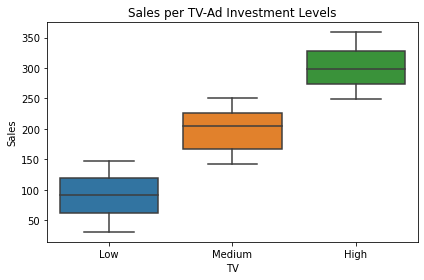

In [15]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ### 
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Sales per TV-Ad Investment Levels")
sns.boxplot(data=data,x='TV',y='Sales',ax=ax)
plt.tight_layout()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

The appears to be a direct relation between the sales and the TV promotion budget. We see that the spread of sales in all boxes of the boxplot are comparable however we do see there is some degree of variation depending on the TV promotion budget.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

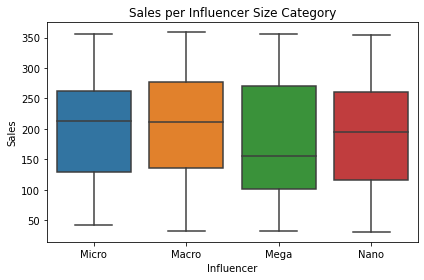

In [14]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ### 
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(data=data, x='Influencer',y='Sales')
ax.set_title("Sales per Influencer Size Category")
plt.tight_layout()


**Question:** Is there variation in `Sales` based off the `Influencer` size?

There doesn't appear to be any variation between the sales and the influencer size, this could be indication that this two variables are independent of one another.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [31]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

# Confirm the data contains no missing values.

### YOUR CODE HERE ### 
data[data.isna().any(axis=1)]

,TV,Radio,Social Media,Influencer,Sales


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the OLS formula.

### YOUR CODE HERE ### 
formula = "Sales ~ C(TV)"

# Create an OLS model and fit model

### YOUR CODE HERE ### 
model = ols(formula=formula,data=data[['Sales','TV']]).fit()

# Save the results summary.

### YOUR CODE HERE ### 
summary = model.summary()

# Display the model results.

### YOUR CODE HERE ### 
print("TV OLS Fit Summary:")
print(summary)

TV OLS Fit Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          8.81e-256
Time:                        19:36:55   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

I chose the TV variable category because this variable had the most significant variation within the two categorical independent variables (TV, Influencer). Therefore, it would be beneficial to quantify this variation bettter with an one-way ANOVA analysis.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

[Write your response here. Double-click (or enter) to edit.]

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

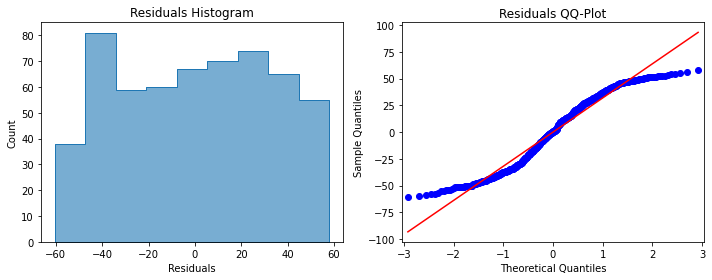

In [54]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = model.resid

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
fig, ax = plt.subplots(figsize=(10,4),ncols=2)
sns.histplot(residuals,ax=ax[0],element='step',alpha=0.6,bins='fd')
ax[0].set_xlabel("Residuals")
ax[0].set_title("Residuals Histogram")

# Create a QQ plot of the residuals.

### YOUR CODE HERE ###
ax[1].set_title('Residuals QQ-Plot')
sm.qqplot(residuals,ax=ax[1],line='s')
plt.tight_layout()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The normality assumption is not met as we can clearly see in the QQ-plot.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

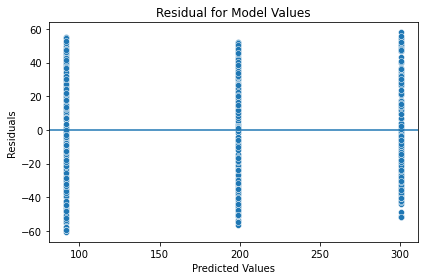

In [59]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
predicted = model.predict(data.TV)

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(y=residuals,x=predicted)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")
ax.set_title("Residual for Model Values")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
ax.axhline(y=0)
plt.tight_layout()



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

The scatter of the residual about the line y=0 appears to be uniform which indicates that the condition for homoscedasticity is met.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [60]:
# Display the model results summary.

### YOUR CODE HERE ### 
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          8.81e-256
Time:                        19:36:55   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** What is your interpretation of the model's R-squared?

With an $R^2 = 0.874$ we can interpret that the model can explain 87.4% of the variation in sales due to the TV promotional budget. This means that the model is a good predictor for the Sales of the company.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

All the coefficients in our model are statistically significant as their P-value is 0, whic allows us to reject the Null-Hypothesis of randomness in the model. We also see that the model picked the `High` category as the reference point. This means that if all other variables are held constant then we would expect the `Medium` TV category to have 101.5 millions less in sales than the `High` category. And the `Low` category would have 208.8 millions less in sales than the `High` category.

**Question:** Do you think your model could be improved? Why or why not? How?

The model could be improved if we added more categories into the TV promotional budget. Similat to the number of categories in the Influencer variable.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [62]:
# Create an one-way ANOVA table for the fit model.

### YOUR CODE HERE ### 
# I want to try the different values for the 'type' argument
sm.stats.anova_lm(model,typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


In [63]:
sm.stats.anova_lm(model,typ = 2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


In [64]:
sm.stats.anova_lm(model,typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,1.589597e+07,1.0,15465.378887,0.000000e+00
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

**Null-Hypothesis:** There is not difference in sales for the different TV promotional budgets

**Alternative Hypothesis:** There is a statistically significant difference between the Sales and the promotional budget for TV.

**Question:** What is your conclusion from the one-way ANOVA test?

The ANOVA test is telling us to reject the Null-Hypothesis and that there exists as statistical significance in the difference between the sales of diffenre TV promotional budgets.

**Question:** What did the ANOVA test tell you?

The difference in sales from each TV category is significant and not due to chance.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [65]:
# Perform the Tukey's HSD post hoc test.

### YOUR CODE HERE ### 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_oneway = pairwise_tukeyhsd(endog = data.Sales, groups = data.TV, alpha = 0.05)

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

This routine compares the difference group in the TV category and check if there exists a significant difference between the Sales of these two groups with a confidence level of 5%.

**Question:** What did the post hoc tell you?**

It shows that all categories in the TV promotional budget have a statistical significant difference in their sales with all other categories.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

ANOVA tests allows to verify the significance between the relationships of variables in a dataset.

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

TV promotional ads are good predictors for the sales of the company.


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.